In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
data=pd.read_csv('loanstatus.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

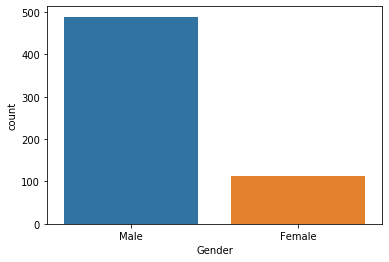

In [7]:
sns.countplot(data['Gender']);

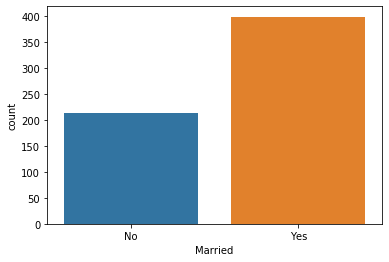

In [8]:
sns.countplot(data['Married']);

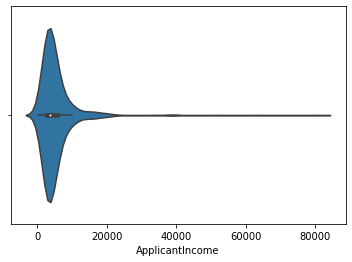

In [13]:
sns.violinplot(data['ApplicantIncome']);

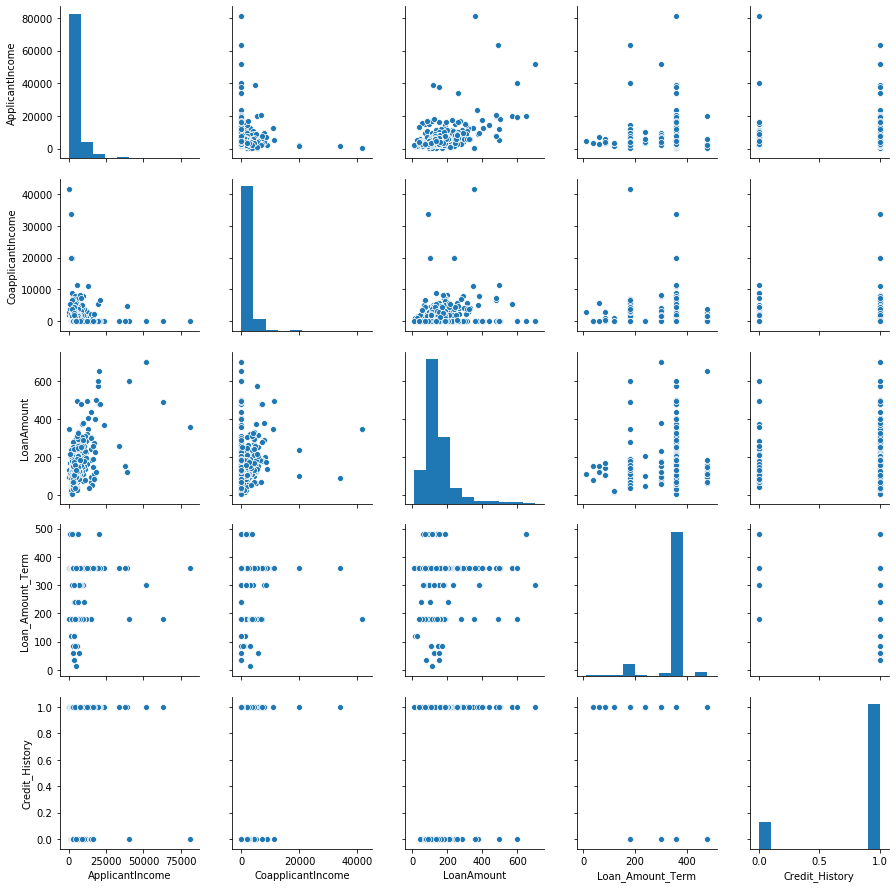

In [14]:
sns.pairplot(data);

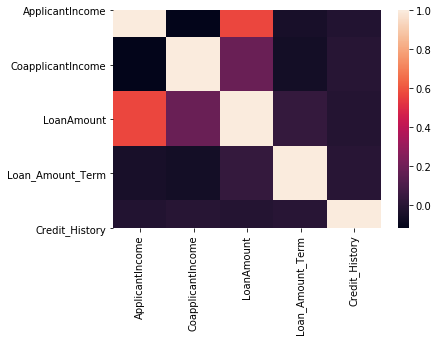

In [15]:
sns.heatmap(data.corr())

In [6]:
data['Dependents']=data['Dependents'].replace("3+",3)

In [7]:
data['Dependents'].mode()

0    0
dtype: object

In [8]:
data['Dependents']=data['Dependents'].fillna(0)

In [9]:
data['LoanAmount'].mode()

0    120.0
dtype: float64

In [10]:
data['LoanAmount']=data['LoanAmount'].fillna(120.0)

In [11]:
data['Gender'].mode()

0    Male
dtype: object

In [12]:
data['Gender']=data['Gender'].fillna('Male')

In [13]:
data['Married'].mode()

0    Yes
dtype: object

In [14]:
data['Married']=data['Married'].fillna('Yes')

In [15]:
data['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [16]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(360.0)

In [17]:
data['Self_Employed'].mode()

0    No
dtype: object

In [18]:
data['Self_Employed']=data['Self_Employed'].fillna('No')

In [19]:
data['Credit_History'].mode()

0    1.0
dtype: float64

In [20]:
data['Credit_History']=data['Credit_History'].fillna(1.0)

In [21]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [23]:
data.drop('Loan_ID',axis=1,inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Married']=data['Married'].astype(str)

In [25]:
data['Married']=le.fit_transform(data['Married'])

In [26]:
data['Gender']=data['Gender'].astype(str)

In [27]:
data['Gender']=le.fit_transform(data['Gender'])

In [28]:
data['Dependents']=data['Dependents'].astype(str)

In [29]:
data['Dependents']=le.fit_transform(data['Dependents'])

In [30]:
data['Education']=data['Education'].astype(str)

In [31]:
data['Education']=le.fit_transform(data['Education'])

In [32]:
data['Self_Employed']=data['Self_Employed'].astype(str)

In [33]:
data['Self_Employed']=le.fit_transform(data['Self_Employed'])

In [34]:
data['Property_Area']=data['Property_Area'].astype(str)

In [35]:
data['Property_Area']=le.fit_transform(data['Property_Area'])

In [36]:
data['Loan_Status']=data['Loan_Status'].astype(str)

In [37]:
data['Loan_Status']=le.fit_transform(data['Loan_Status'])

In [38]:
data.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [39]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [40]:
data['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

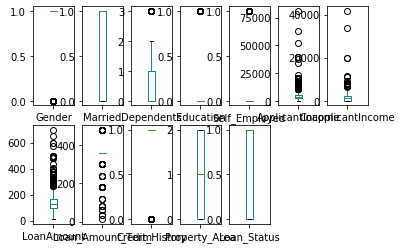

In [41]:
data.plot(kind='box',subplots=True,layout=(2,7));

In [42]:
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(614, 12)
(577, 12)


In [43]:
data=data_final
data.shape

(577, 12)

In [44]:
data.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.163426
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [45]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.sqrt(data[col])

In [46]:
data.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.610338
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207591
LoanAmount           0.376128
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [47]:
df_x=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']
df_x.shape,y.shape

((577, 11), (577,))

In [48]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
ss=MinMaxScaler()
x=ss.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.488404,0.000000,0.482275,0.6,1.0,1.0
1,1.0,1.0,0.577350,0.0,0.0,0.421635,0.409791,0.504057,0.6,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.323351,0.000000,0.310668,0.6,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.293323,0.512429,0.482275,0.6,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.495862,0.000000,0.538048,0.6,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
572,0.0,0.0,0.000000,0.0,0.0,0.316351,0.000000,0.328985,0.6,1.0,0.0
573,1.0,1.0,1.000000,0.0,0.0,0.394111,0.000000,0.201567,0.0,1.0,0.0
574,1.0,1.0,0.577350,0.0,0.0,0.590033,0.163481,0.782484,0.6,1.0,1.0
575,1.0,1.0,0.816497,0.0,0.0,0.569017,0.000000,0.647209,0.6,1.0,1.0


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [50]:
lr=LogisticRegression()
svc=SVC()
nb=GaussianNB()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
ad=AdaBoostClassifier()

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=95,test_size=.20)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
lr.score(x_train,y_train)

0.8026030368763557

In [52]:
model_list=[]
model_list.append(('LogisticRegression',lr))
model_list.append(('SVC',svc))
model_list.append(('Kneighbors',knn))
model_list.append(('DecisionTreeClassifier',dt))
model_list.append(('GaussianNB',nb))
model_list.append(('RandomForestClassifier',rf))
model_list.append(('GradientBoostingClassifier',gb))
model_list.append(('XGBoostClassifier',xgb))
model_list.append(('AdBoostingClassifier',ad))

********************** LogisticRegression ************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy is  0.8793103448275862


cross_val is  0.8182017543859649


F1_score is 0.9239130434782609


roc_auc_score 0.7775193798449611


classification report               precision    recall  f1-score   support

           0       0.94      0.57      0.71        30
           1       0.87      0.99      0.92        86

    accuracy                           0.88       116
   macro avg       0.91      0.78      0.82       116
weighted avg       0.89      0.88      0.87       116



confusion matrix
 [[17 13]
 [ 1 85]]





********************** SVC ************************
SVC(C=1.0, cache_size=20

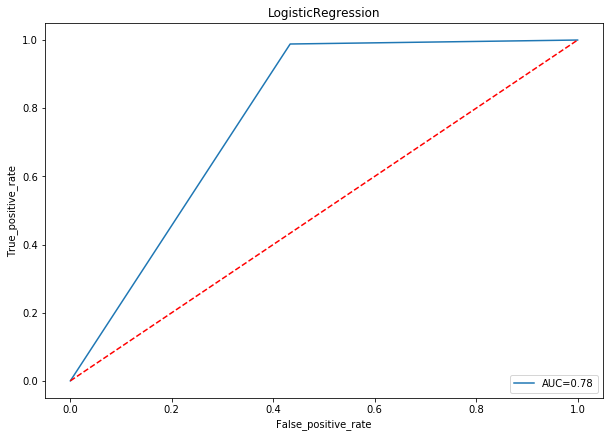

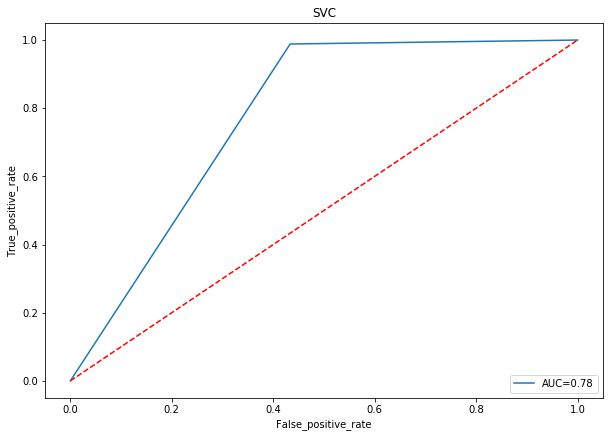

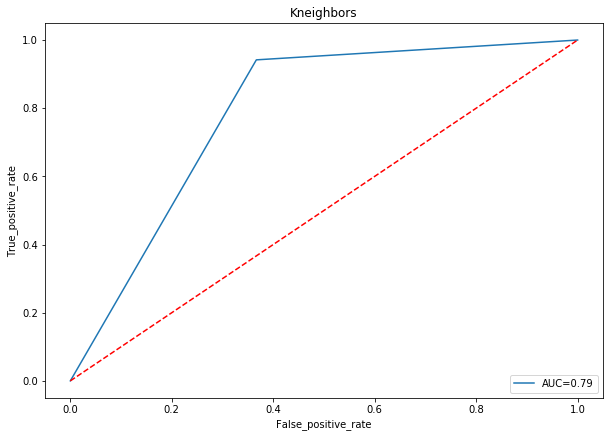

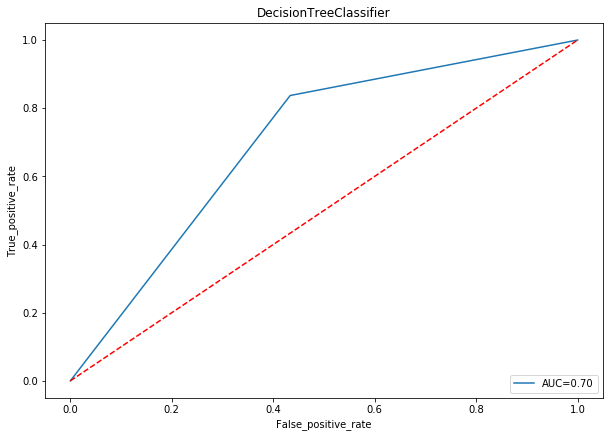

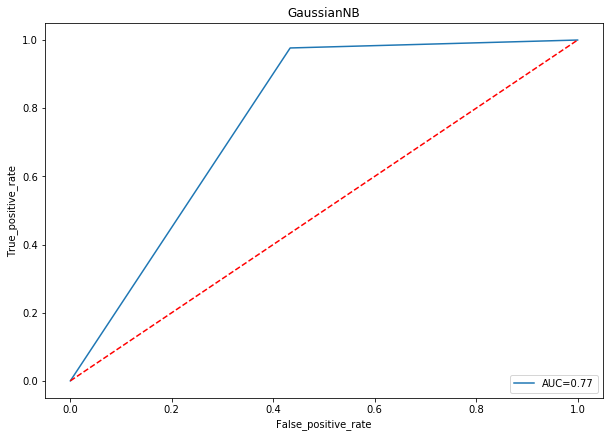

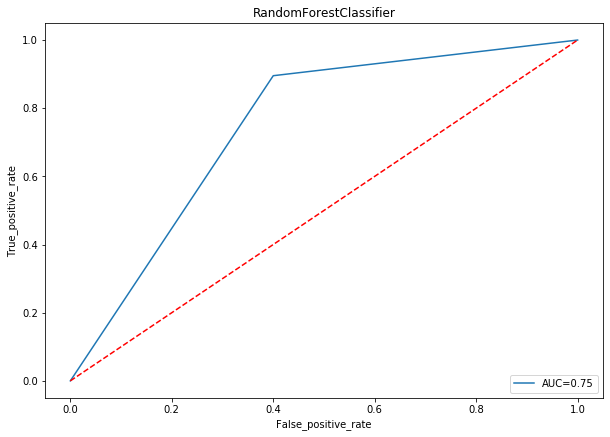

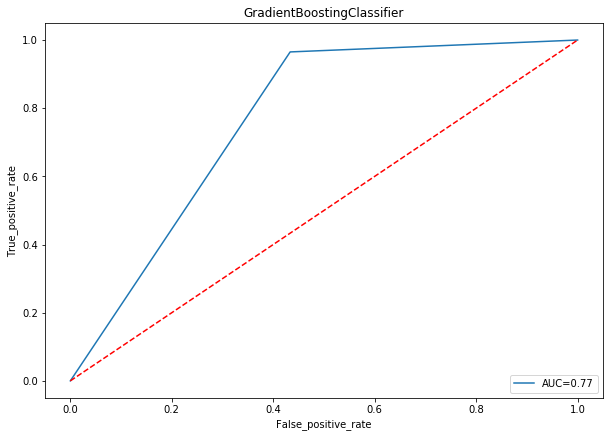

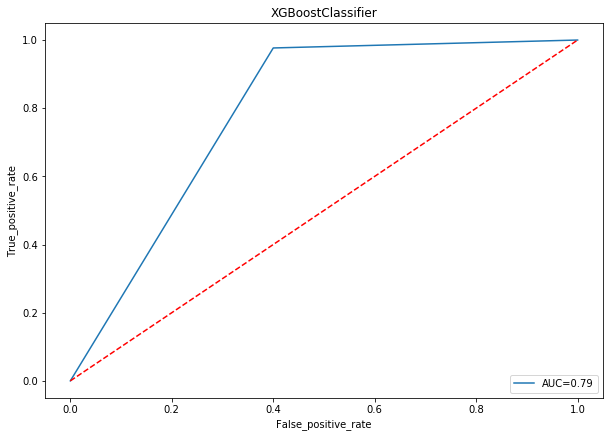

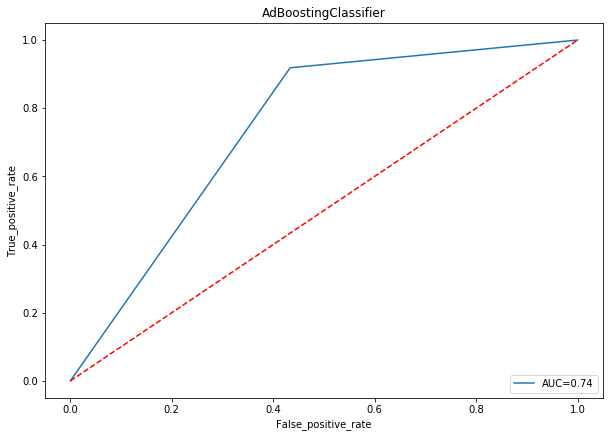

In [53]:
Model=[]
accuracy=[]
CS=[]
F1_score=[]
rocscore=[]
for name,model in model_list:
    print('**********************',name,'************************')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(pred,y_test)
    print('accuracy is ',AS)
    accuracy.append(AS*100)
    print('\n')
    cs=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val is ',cs)
    CS.append(cs*100)
    print('\n')
    f1=f1_score(y_test,pred)
    print('F1_score is',f1)
    F1_score.append(f1*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('confusion matrix\n',confusion_matrix(y_test,pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(511)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False_positive_rate')
    plt.ylabel('True_positive_rate')
    print('\n\n')

In [54]:
best_model=pd.DataFrame({'Model': Model,'Accuracy':accuracy,'CV_Score':CS,'F1_Score':F1_score,'Roc_score':rocscore})
best_model

,Model,Accuracy,CV_Score,F1_Score,Roc_score
0,LogisticRegression,87.931034,81.820175,92.391304,77.751938
1,SVC,87.931034,81.820175,92.391304,77.751938
2,Kneighbors,86.206897,79.723663,91.011236,78.759690
3,DecisionTreeClassifier,76.724138,70.890481,84.210526,70.193798
4,GaussianNB,87.068966,81.296884,91.803279,77.170543
5,RandomForestClassifier,81.896552,77.999417,88.000000,74.767442
6,GradientBoostingClassifier,86.206897,79.578796,91.208791,76.589147
7,XGBoostClassifier,87.931034,80.597939,92.307692,78.837209
8,AdBoostingClassifier,82.758621,79.230944,88.764045,74.263566


In [55]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
knngd=GridSearchCV(knn,param_grid=[{'n_neighbors':[i for i in range(1,33,2)],
                                 'weights':['uniform','distance']}],cv=5)
knngd.fit(x_train,y_train)
print(knngd.best_score_)
print(knngd.best_params_)
                             

0.7939262472885033
{'n_neighbors': 11, 'weights': 'uniform'}


In [56]:
rf=RandomForestClassifier()
rfgd=GridSearchCV(rf,param_grid=[{'n_estimators':[50,100,150,200],
                                'criterion':['gini','entropy'],
                                 
                                 'max_depth':[2,3,5,7,8]}],cv=10)
rfgd.fit(x_train,y_train)
print(rfgd.best_score_)
print(rfgd.best_params_)

0.8112798264642083
{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 50}


In [57]:
gb=GradientBoostingClassifier()
gbgd=GridSearchCV(gb,param_grid=[{'n_estimators':[50,100,150,200],
                                'loss':['deviance','exponential'],
                                 
                                 'max_depth':[2,3,4,5,6,7,8]}],cv=10)
gbgd.fit(x_train,y_train)
print(gbgd.best_score_)
print(gbgd.best_params_)


0.7960954446854663
{'loss': 'exponential', 'max_depth': 2, 'n_estimators': 50}


In [58]:
from sklearn.model_selection import GridSearchCV
xgb=XGBClassifier()
xggd=GridSearchCV(xgb,param_grid=[{'n_estimators':[100,150,200],
                                 'max_depth':[2,3,4,5,6,7,8],
                                  }],cv=10)
xggd.fit(x_train,y_train)
print(xggd.best_score_)
print(xggd.best_params_)

0.7874186550976139
{'max_depth': 2, 'n_estimators': 100}


In [59]:
from sklearn.model_selection import GridSearchCV
ad=AdaBoostClassifier()
gd=GridSearchCV(ad,param_grid=[{'base_estimator':[gb]}],cv=10)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)


0.7418655097613883
{'base_estimator': GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)}


In [60]:
from sklearn.model_selection import GridSearchCV
ad=AdaBoostClassifier()
adlrgd=GridSearchCV(ad,param_grid=[{'base_estimator':[lr]}],cv=10)
adlrgd.fit(x_train,y_train)
print(adlrgd.best_score_)
print(adlrgd.best_params_)


0.8026030368763557
{'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)}


In [61]:
from sklearn.model_selection import GridSearchCV
ad=AdaBoostClassifier()
adgbgd=GridSearchCV(ad,param_grid=[{'base_estimator':[gb]}],cv=10)
adgbgd.fit(x_train,y_train)
print(adgbgd.best_score_)
print(adgbgd.best_params_)


0.7462039045553145
{'base_estimator': GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)}


In [62]:
from sklearn.model_selection import GridSearchCV
ad=AdaBoostClassifier()
adxggd=GridSearchCV(ad,param_grid=[{'base_estimator':[xgb]}],cv=10)
adxggd.fit(x_train,y_train)
print(adxggd.best_score_)
print(adxggd.best_params_)


0.6767895878524945
{'base_estimator': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)}


In [63]:
from sklearn.externals import joblib
joblib.dump(xgb,'Loanstatus_joblib')

['Loanstatus_joblib']